In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from psis import psisloo
from os import path as op

In [29]:
with open(op.join("..", "wellbeing_hierarchical_binomial.pkl"), "rb") as f:
    posterior_samples = pickle.load(f)

    
# Shape n-samples x m-parameters
p_regional = np.array(posterior_samples[0])
log_lik = np.array(posterior_samples[1])
national_sigma = np.array(posterior_samples[2])
national_mu = np.array(posterior_samples[3])

In [30]:
print(p_regional.shape)
print(log_lik.shape)
print(national_sigma.shape)
print(national_mu.shape)

(1000, 100)
(1000, 2841)
(1000,)
(1000,)


In [31]:
# Verify the data probabilities are <= 1.

assert np.sum(log_lik > 0.) == 0, "data-probabilities higher than 1.0"
assert np.sum(np.isnan(log_lik)) == 0, "data-probabilities contain nans"

In [82]:
with open(op.join("..", 'paavodata_cleaned_df.pkl'), 'rb') as f:
    paavo_df = pickle.load(f)

not_isnan_ix = np.logical_not(np.logical_or(np.isnan(paavo_df["n_households_2015"]), np.isnan(paavo_df["n_households_highest_income_2015"])))
df = paavo_df[not_isnan_ix]
area_to_ix = df["Postal code area"]
area_to_ix = area_to_ix.to_frame()
area_to_ix["ix"] = list(range(1, len(df["Postal code area"])+1))
print(area_to_ix[area_to_ix["ix"] == 77])

                                 Postal code area  ix
postal_code                                          
00940        00940 Kontula - Vesala   (Helsinki )  77


In [81]:
affluent = paavo_df.loc["00940", "n_households_highest_income_2015"]
households = paavo_df.loc["00940", "n_households_2015"]
print(affluent/households)

0.10762366938008766


In [98]:
# PSISLOO
# Kontula (index, 76) has likelihood of 0.0
modified_log_lik = log_lik.copy()
modified_log_lik[:, 76] = modified_log_lik[:, 76] + 150

loo, loos, khat = psisloo(modified_log_lik)

log_pred_dens = np.log(np.exp(modified_log_lik).mean(axis=0)).sum()

print(f"PSIS-LOO: {loo}")
print(f"n_eff: {log_pred_dens - loo}")

PSIS-LOO: -39798.04720064491
n_eff: 2059.153619775665


Text(0.5, 1.0, 'Khat values of the Gaussian model')

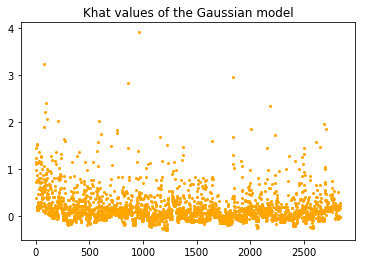

In [99]:
fig, ax = plt.subplots(1,1)
ax.scatter(range(0,len(khat)), khat, color="Orange", s=4)
ax.set_title("Khat values of the Gaussian model")

In [100]:
print(np.sum(khat <= 0.7))
print(np.sum(khat > 0.7))

2668
173
